# Find duplicates in Cifar10 with imagededup

We will download the Cifar10 dataset and then run the **CNN** method from **imagededup** to detect duplicates.

In [1]:
# installing imagededup
!pip install imagededup --no-deps

In [2]:
# download Cifar10 dataset and untar
!wget http://pjreddie.com/media/files/cifar.tgz
!tar xzf cifar.tgz

URL transformed to HTTPS due to an HSTS policy
--2019-10-01 08:47:46--  https://pjreddie.com/media/files/cifar.tgz
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168584360 (161M) [application/octet-stream]
Saving to: ‘cifar.tgz.1’

cifar.tgz.1         100%[===================>] 160.77M  10.5MB/s    in 21s     

2019-10-01 08:48:07 (7.69 MB/s) - ‘cifar.tgz.1’ saved [168584360/168584360]



In [0]:
from pathlib import Path

# train images are stored under '/content/cifar/train'
filenames_train = set([i.name for i in Path('/content/cifar/train').glob('*.png')])

# test images are stored under '/content/cifar/test'
filenames_test = set([i.name for i in Path('/content/cifar/test').glob('*.png')])

In [4]:
# move all images into single directory
image_dir = 'cifar10_images'
!mkdir $image_dir
!cp -r '/content/cifar/train/.' $image_dir
!cp -r '/content/cifar/test/.' $image_dir

mkdir: cannot create directory ‘cifar10_images’: File exists


In [5]:
# find duplicates with CNN
from imagededup.methods import CNN
cnn = CNN()
encodings = cnn.encode_images(image_dir=image_dir)
duplicates = cnn.find_duplicates(encoding_map=encodings)

Using TensorFlow backend.


2019-10-01 08:48:30,449: INFO Initialized: MobileNet pretrained on ImageNet dataset sliced at last conv layer and added GlobalAveragePooling
2019-10-01 08:48:30,451: INFO Start: Image feature generation


922/922 [==============================] - 170s 185ms/step


2019-10-01 08:51:22,247: INFO End: Image feature generation
2019-10-01 08:51:22,453: INFO Start: Calculating cosine similarities...


Large feature matrix thus calculating cosine similarities in chunks...


100%|██████████| 59/59 [01:36<00:00,  1.08s/it]
2019-10-01 08:53:02,467: INFO End: Calculating cosine similarities.


In [0]:
# plot duplicates
from imagededup.utils import plot_duplicates
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)

## Duplicates in test set

In [0]:
# keep only filenames that are in test set
duplicates_test = {}
for k, v in duplicates.items():
  if k in filenames_test:
    tmp = [i for i in v if i in filenames_test]
    duplicates_test[k] = tmp
    
# sort in descending order of duplicates
duplicates_test = {k: v for k, v in sorted(duplicates_test.items(), key=lambda x: len(x[1]), reverse=True)}

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


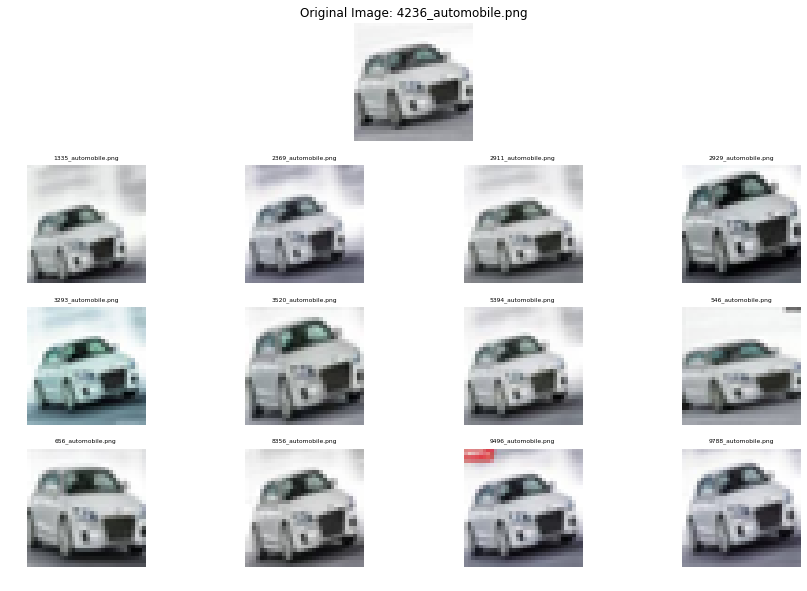

In [8]:
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_test, filename=list(duplicates_test.keys())[0])

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


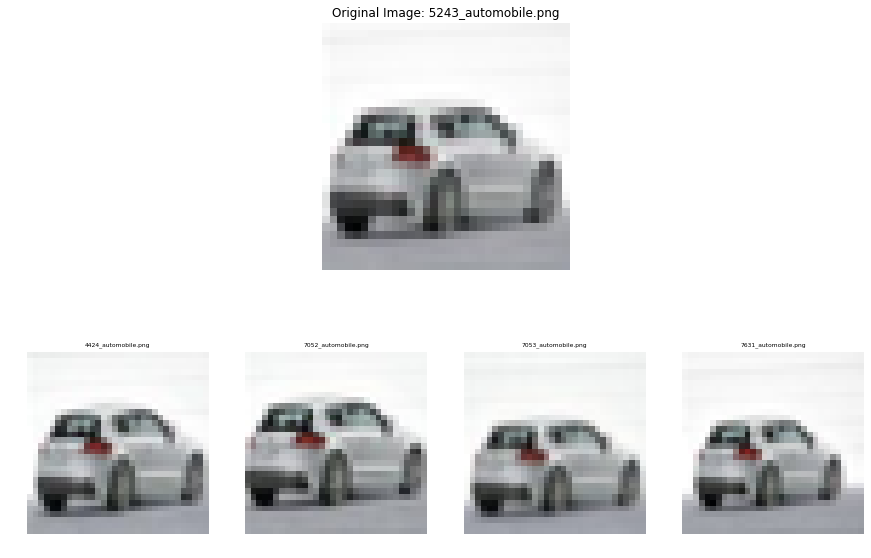

In [9]:
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_test, filename=list(duplicates_test.keys())[15])

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


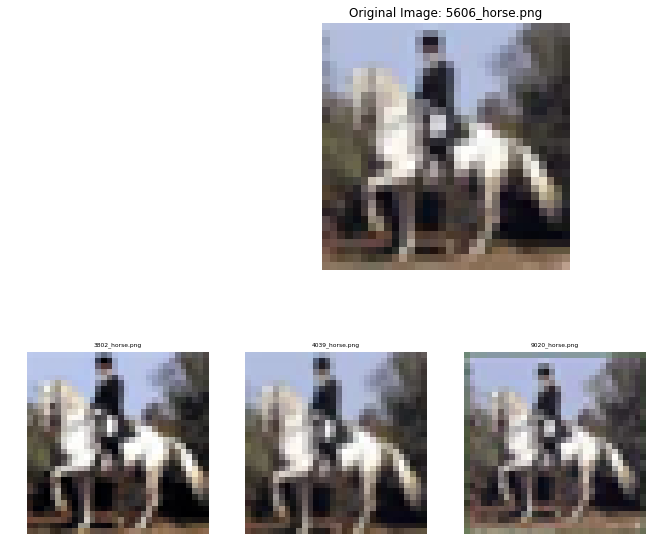

In [10]:
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_test, filename=list(duplicates_test.keys())[20])

## Duplicates in train set

In [0]:
# keep only filenames that are in train set
duplicates_train = {}
for k, v in duplicates.items():
  if k in filenames_train:
    tmp = [i for i in v if i in filenames_train]
    duplicates_train[k] = tmp
    

# sort in descending order of duplicates
duplicates_train = {k: v for k, v in sorted(duplicates_train.items(), key=lambda x: len(x[1]), reverse=True)}

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


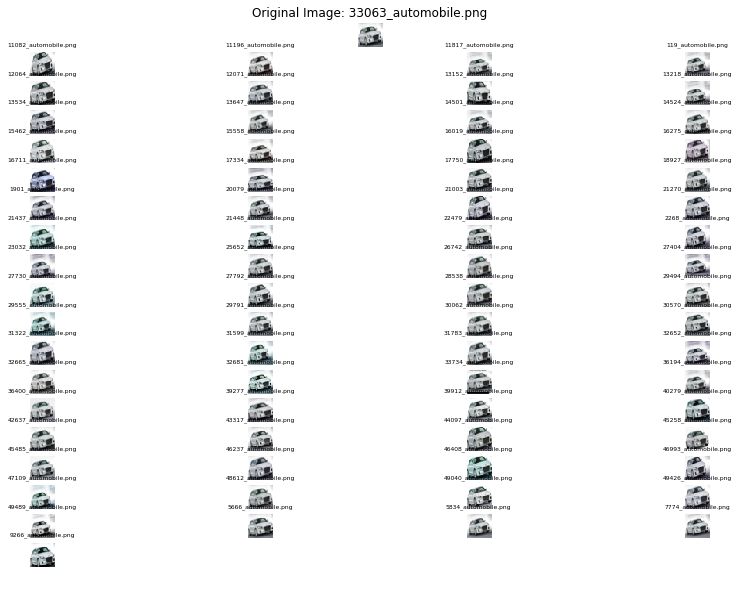

In [12]:
# 70 duplicates found of same car!
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_train, filename=list(duplicates_train.keys())[0])

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


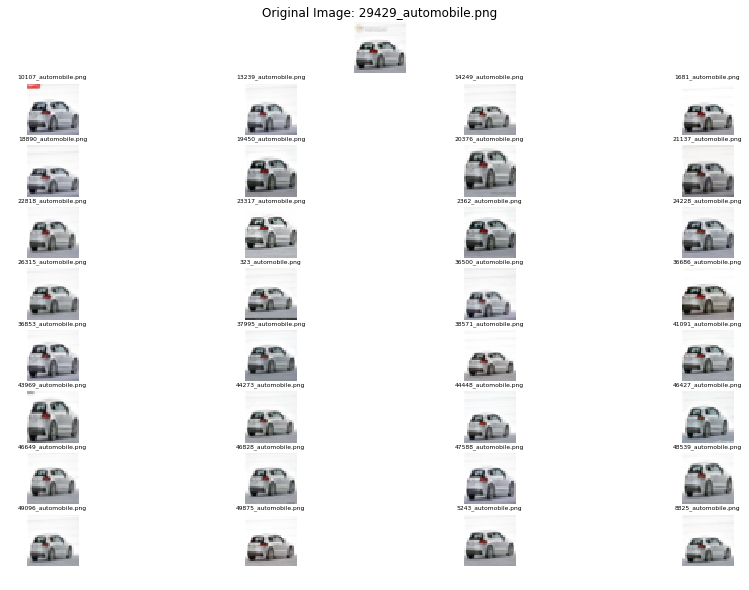

In [13]:
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_train, filename=list(duplicates_train.keys())[70])

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


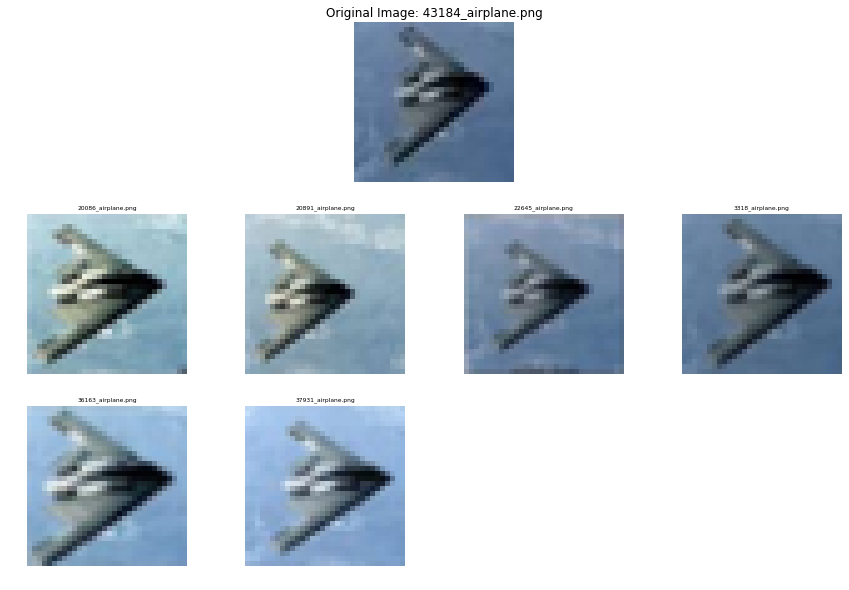

In [14]:
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_train, filename=list(duplicates_train.keys())[140])

## Examples from test set with duplicates in train set

In [0]:
# keep only filenames that are in test set have duplicates in train set
duplicates_test_train = {}
for k, v in duplicates.items():
  if k in filenames_test:
    tmp = [i for i in v if i in filenames_train]
    duplicates_test_train[k] = tmp
    
# sort in descending order of duplicates
duplicates_test_train = {k: v for k, v in sorted(duplicates_test_train.items(), key=lambda x: len(x[1]), reverse=True)}

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


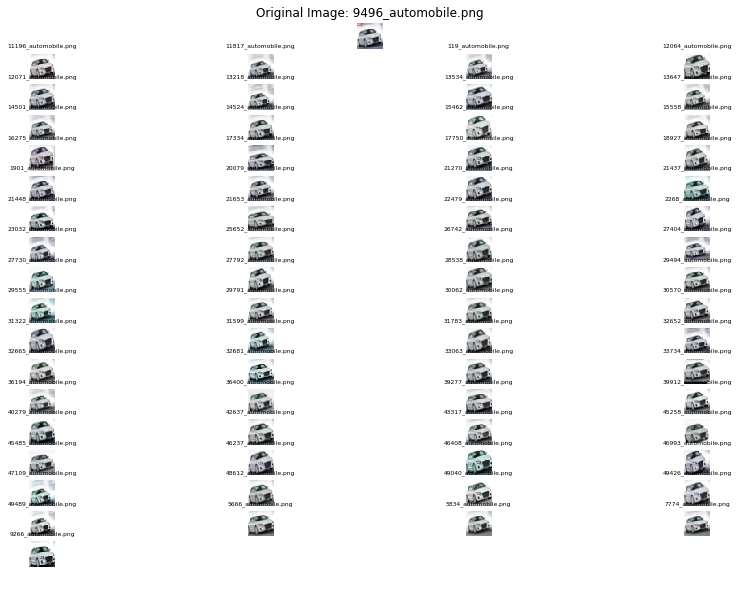

In [16]:
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_test_train, filename=list(duplicates_test_train.keys())[0])

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


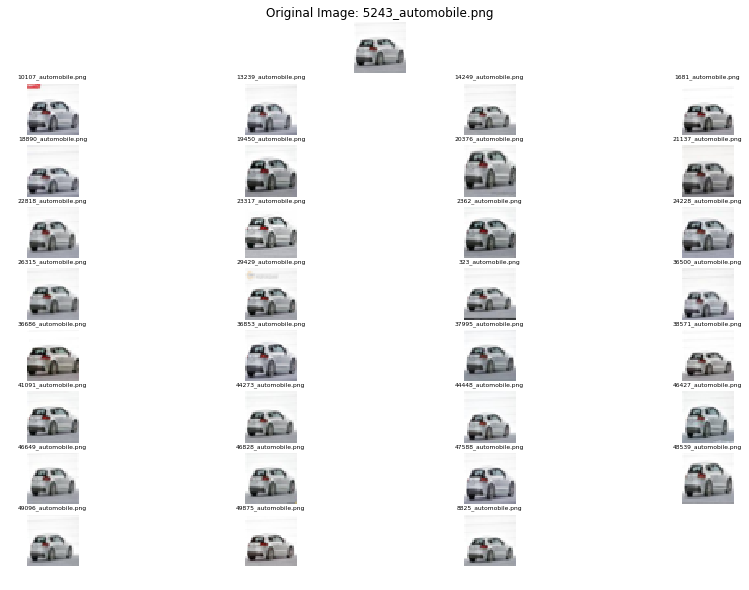

In [17]:
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_test_train, filename=list(duplicates_test_train.keys())[15])

/usr/local/lib/python3.6/dist-packages/matplotlib/tight_layout.py:231: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


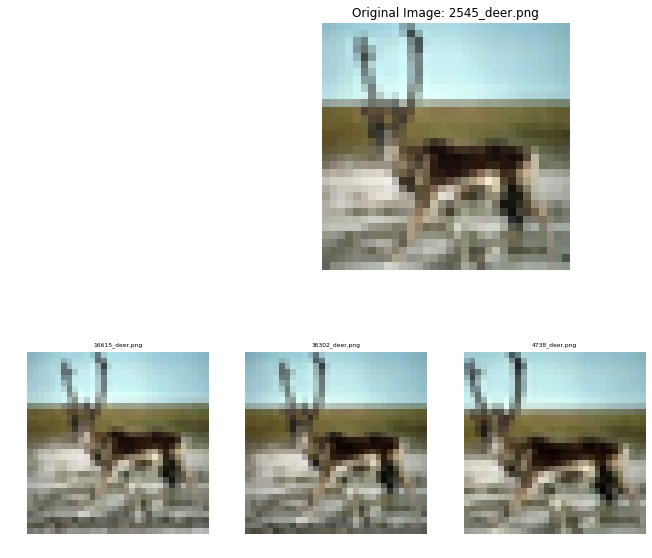

In [18]:
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_test_train, filename=list(duplicates_test_train.keys())[50])